**Import the utilities file :**  This file contains all necessary helper functions that will be required for out implementations additionally it also imports necessary qiskit modules into the current environment.

In [2]:
%run quantum_permutation_utils.py
from quantum_permutation_utils import *

## Secret Sharing using Quantum Permuatation Generation
###### In this short tutorial we will describe the quantum permutation algorithm that we have used for the game.

### Generating Permutations on Quantum Computers

#### <u>An algorithm to generate permutations</u>

The main idea follows from the classical permutation generation algorithms, where the our aim is to generate all possible permutation of a given string of elements. For eg. all possible permutations of the string '123' would be '132', '132', '213', '231', '312' and '123'. In general any string of $n$ distinct elements will have $n!$ different permutations.

 Most permutation generating algorithms work by iteratively transposing (swapping) two elements of the string to generate all possible permutation of the elements for eg. [Heap's algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm). However, here we will take a slightly different approach, which might be a bit ineffecient when comapred to existing algorithms but is a better match to use for our secret sharing protocol.

Let's understand the algorithm through an example. 

Say we have to generate all possible permutations of the initial string, $s_0$: '123'.  

To do this we define to define two permutation operations $\mathcal{\hat{P}_2}$ and $\mathcal{\hat{P}_3}$ where their action on the string is given by 
$$  \mathcal{\hat{P_2}}\; (123) = (213) $$ 
$$  \mathcal{\hat{P_3}}\; (123) = (312) $$

It is clear that the action of $\mathcal{\hat{P}_2}$ is to swap the element at the first and second postion and whereas the action of $\mathcal{\hat{P}_3}$ is to circulate the three elements one unit to the right. Note that we can also define integral powers of these operators as operating them on the string an integer number of times.

For eg.
$$  \mathcal{\hat{P}^2_2} (123) = \mathcal{\hat{P}_2}\mathcal{\hat{P}_2} (123) = \mathcal{\hat{P}_2}(213) = (123) $$
$$  \mathcal{\hat{P}^2_3} (123) = \mathcal{\hat{P}_3}\mathcal{\hat{P}_3} (123) = \mathcal{\hat{P}_2} (312) = (231) \:\;\: \:\;\: \:\;\: \mathcal{\hat{P}^3_3} (123) = \mathcal{\hat{P}_3} \mathcal{\hat{P}^2_3} (123) = \mathcal{\hat{P}_3} (231) = (123)        $$

Note that the action of $\mathcal{\hat{P}^2_2}$ and $\mathcal{\hat{P}^3_3}$ is same as that of doing nothing, which we may express as $\mathcal{\hat{I}}$ the identity operator.

Given these operators, we claim that the by composing these appropriate powers of them we can generate all 6 (3!) permutations of the input string. Consider the follwoing set of composition of the operators $ \{ \mathcal{\hat{I}},  \mathcal{\hat{P}_2} \} $  and $\{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}  \}$ i.e 
$$  \mathcal{P} =  \{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}  \} \cdot \{ \mathcal{\hat{I}},  \mathcal{\hat{P}_2} \}  =  \{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}, \mathcal{\hat{P}_2}, \mathcal{\hat{P}_3}\mathcal{\hat{P}_2}, \mathcal{\hat{P}^2_3}\mathcal{\hat{P}_2}      \}$$

Now consider the action of all the operators in $\mathcal{P}$ over the initial state '123' : 
$$ \mathcal{I}(123) = (123) \;\:\:\;\:\ \mathcal{\hat{P}_3}(123) = (312) \;\:\:\;\:\ \mathcal{\hat{P}^2_3}(123) = (231) \;\:\:\;\:\ \mathcal{\hat{P}_2}(123) = (213) \;\:\:\;\:\ \mathcal{\hat{P}_3}\mathcal{\hat{P}_2}(123) = (321) \;\:\:\;\:\  \mathcal{\hat{P}^2_3}\mathcal{\hat{P}_2}(123) = (132)
$$
Thus we have succesfully generated all possible permutations of the input string 

**!VISUALS-NEEDED!** : To depict the permutation operation for this case 

The above described method can be easily be generalised easily for a string of any size, all that will be required are sufficient no. of permutations operators. For a string of 'n' of distinct elements we need of n-1 permutation operators $\{ \mathcal{\hat{P}_2}, \mathcal{\hat{P}_3} . . . \mathcal{\hat{P}_n} \}$, where any operator $\mathcal{\hat{P}_j}$ can be raised to powers between $\{ 0,1.. j-1 \}$. The set of possible by permutations $\mathcal{P}$ will be then given by composing all different powers of the different permutation operators, as 
$$  \mathcal{P} = \{ \mathcal{I}, \mathcal{\hat{P}_n}, \mathcal{\hat{P}^2_n} . . . \mathcal{\hat{P}^{n-1}_n}  \}\cdot. . .\cdot \{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}  \} \cdot \{ \mathcal{\hat{I}},  \mathcal{\hat{P}_2} \}  $$

One can esily verify that the above composition yeilds in total $n!$ distinct operations for the set $\mathcal{P}$, thus ensuring that all possible permutations are generated.

Note that it is possible to generate the set of possible permutations $\mathcal{P}$ using only the swap operation on different position of the data strings, however we use the method described here to keep things in track with our protocol. But this fact will have its effect in the quantum version of the protocl, as any permutation operator $\mathcal{\hat{P}_j}$ will be implemented using composition of swap operations. 

#### <u>A Quantum version of the algorithm</u>

Designing a 'quantum' version of this algorithm won't be difficult as we have already defined the procedure in terms of operators which can be easily implemented on gate-based quantum computers like **IBM Quantum** , this follows from the fact that the permutation operators are unitary. However our aim is a bit more subtle here, as we intend to prepare a state in an *'equal superposition of all possible permutations'* of the input string which will be later on used as a funndamental unit of our secret charing protocol.  

**For example :**  let's say we are given the initial state $\ket{\psi_0}$ which is product of two distinct single qubit states $ \{ \ket{\phi_1}, \ket{\phi_2} \}$, say
$$ \ket{\psi_0}  = \ket{\phi_1}\ket{\phi_2} $$
Now the only other possible permutation of the single qubit states would be $ \ket{\phi_2}\ket{\phi_1} $. So by *'equal superpostion of all possible permutations'* we seek a state of the form
$$  \frac{1}{\sqrt{2}} \big( \ket{\phi_1}\ket{\phi_2} + \ket{\phi_2}\ket{\phi_1}   \big)   $$

However, note that a transformation like this 
$$   \ket{\phi_1}\ket{\phi_2} \to  \frac{1}{\sqrt{2}} \big( \ket{\phi_1}\ket{\phi_2} + \ket{\phi_2}\ket{\phi_1} \big) $$ 
is not unitary, thus cannot be implemented on a gate-based device. Though a particular permutation might be implemented easily using the pre-defined permutation operators, for eg. $\hat{P}_2 \ket{\phi_1}\ket{\phi_2} = \ket{\phi_2}\ket{\phi_1} $

So, we use a slighly different trick to get through this difficulty. We start by intorducing an ancilla qubit in the $\ket{+} = \ket{0} + \ket{1}$ state and acting the $\hat{P}_2$ operator upon the data qubits controlled by the ancilla, i.e 
$$   \ket{\phi_1}\ket{\phi_2}\ket{0} + \ket{\phi_1}\ket{\phi_2}\ket{1} \; \to \;  \hat{I}\big( \ket{\phi_1}\ket{\phi_2} \big) \ket{0} + \hat{P}_{2} \big( \ket{\phi_1}\ket{\phi_2} \big)\ket{1}  \; = \;  \ket{\phi_1}\ket{\phi_2}\ket{0} + \ket{\phi_2}\ket{\phi_1}\ket{1}  $$
The above transformation is unitary and can be realised using quantum computers. The essential trick here was to use the ancilla qubits to control the action of the permutation operator on the data qubits, this same trick will be helpful in generalising this procedure later, but before let's implemeent it in qiskit.
###### *(here we ignored the overall normalisation factors)*

**Qiksit Implementation**: The above procedure can be easily implemented in qiskit

We initiate the state with $\ket{\phi_1} = 0$ and $\ket{\phi_2} = 1$, which will be contained in the `msg` register. Also we use an ancilla `cntrl` to controls the swap operation.

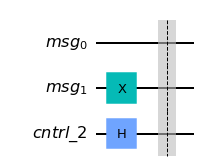

In [3]:
## circuit initialisation ~
qreg = QuantumRegister(2, name= 'msg')
ancilla = QuantumRegister(1, name= 'cntrl_2')
qc = QuantumCircuit(qreg, ancilla)

## state initialisation ~
qc.x(qreg[1])
qc.h(ancilla)
qc.barrier()
qc.draw(output= 'mpl')

Next we generate hte required permutation operator, whihc in this case will be $\hat{P}_2$

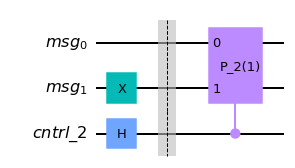

In [4]:
## generate the permutation operator ~
p2 = generate_permutation_operators(2)

## apply the permutation operator conditioned on the `cntrl`
qc.append(p2.control(1), [ancilla, qreg[0], qreg[1]] )

qc.draw(output= 'mpl')

Under the hood this particular operator is composed of simple `'SWAP'` gates , this can be visualised by decomposing the circuit 

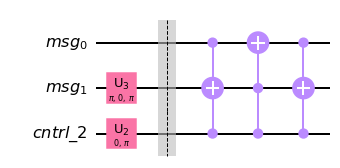

In [5]:
qc.decompose().draw(output= 'mpl')

Let's know measure and check the state of the `msg` and `cntrl` qubits.

str
{'0 01': 512, '1 10': 512}


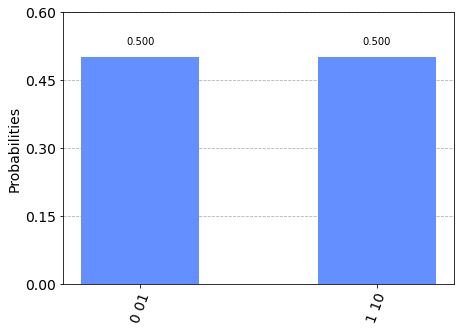

In [6]:
measure_and_plot(qc, show_counts= True, measure_ancilla= True, ancilla_specifier= 'all')

 The first bit indicates the state of the `cntrl` register and rest indicates the state of the `msg` register. Here, the '`0 01`' state corresponds the state where the states are not permuted wheras the '`1 10`' state correspond the permuted state.

 <!-- NB: Here we will follow the standatrd big-endian notation as used in qiskit  -->

Similarly we could generate permutations for 3-bit strings also, using two different ancilla registers which will condition the action of the permutation operators $ \{ \hat{P}_2, \hat{P}_3\}$. Given the states $\{ \ket{\phi_1} , \ket{\phi_2} , \ket{\phi_3} \} $, the action of the conditioned permutation operators can be shown as 
- $\:\; \hat{P}^0_3\hat{P}^0_2\ket{ \phi_1\phi_2\phi_3} \ket{0}\ket{0} \to \ket{ \phi_1\phi_2\phi_3} \ket{0}\ket{0} $ 
- $\:\; \hat{P}^1_3\hat{P}^0_2\ket{ \phi_1\phi_2\phi_3} \ket{1}\ket{0} \to \ket{ \phi_3\phi_1\phi_2} \ket{1}\ket{0} $
- $\:\:\;\;  .  $
- $\:\;\;\;  .. $
- $\:\; \hat{P}^2_3\hat{P}^1_2\ket{ \phi_1\phi_2\phi_3} \ket{2}\ket{1} \to \ket{ \phi_1\phi_3\phi_2} \ket{2}\ket{1} $ 


Together they will transform the initial state as follows,
$$ \big(\ket{\phi_1\phi_2\phi_3}\big) \big( \ket{0}+\ket{1}+\ket{2} \big) \big( \ket{0} + \ket{1} \big)  \:\; \to \;\: \ket{\phi_1\phi_2\phi_3}\ket{0}\ket{0} + \ket{\phi_3\phi_1\phi_2}\ket{1}\ket{0} + ... \ket{\phi_1\phi_3\phi_2}\ket{2}\ket{1}
$$

**Generalisation :** Following through the patterns in the above example we can write the general transformation for any arbitrary number of qubits
$$  \big( \ket{\phi_1\phi_2 ...\phi_n}  \big) \otimes \ket{k_n}\ket{k_{n-1}} . . . \ket{k_2}  \:\;\: \to \:\;\:  \hat{P}^{k_n}_n\hat{P}^{k_{n-1}}_{n-1}. . \hat{P}^{k_2}_{2}  \big( \ket{\phi_1\phi_2 ...\phi_n}  \big) \otimes \ket{k_n}\ket{k_{n-1}} . . . \ket{k_2} $$

Thus the equal superposition of possible permutations can be written as 
$$  \mathcal{\hat{P}}\{\phi_1, \phi_2 . . . \phi_n \}  \:=\:  \sum_{k_n \in \{0,1,. . n-1\}} \sum_{\; k_{n-1} \in \{0,1.. n-2 \}} . . . \sum_{ k_2 \in \{0,1\} }\;\;\; \frac{1}{\sqrt{n!}} \;\;\; \hat{P}^{k_n}_n\hat{P}^{k_{n-1}}_{n-1}. . \hat{P}^{k_2}_{2}  \big( \ket{\phi_1\phi_2 ...\phi_n}  \big) \otimes \ket{k_n}\ket{k_{n-1}} . . . \ket{k_2}
$$

The above mentioned procedure is generalisable and also easily implementable on current day quantum computers as we will see in the examples below.

**Resource requirements :** A measure of the required resources can be easily obtained. Observe that any control ancilla $\ket{k_j}$ can take only $j$ distinct integral values which could be represented by atmost $\lceil log j \rceil$ qubits, now since there are n different such control ancillas we have in total $\lceil log\: 2 \rceil + \lceil log\: 3 \rceil + . . . + \lceil log\: n  \rceil \approx log(n!) $ ancilla qubits and $n$ qubits to represent the data itself amounting to an overall of $ log(n!) + n \approx O(n\:log(n))$ qubits. However the circuit depth will scale as $O(n!)$ for large which is similar to the time complexity classical permutation genration algorithms.
 
Refer to [How to implement a gate that generate a uniform superposition of all permutation of element](https://quantumcomputing.stackexchange.com/questions/11682/generate-a-quantum-state-that-sums-up-all-permutations-of-elements) for an insightful discussion on the possible ways of generating an uniform superposition of the permutation of qubit states.

Now we give an example of permuting a 3 qubit state, and some of the problems that might arise in practise thereof ,

We start by initialising the state using $\ket{\phi_1} = \ket{1}$, $\ket{\phi_2} = \ket{0}$, $\ket{\phi_0} = \ket{1}$

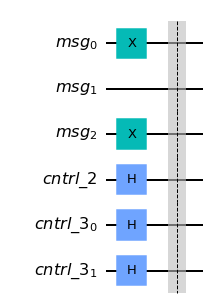

In [7]:
## circuit initialisation ~
qreg = QuantumRegister(3, name= 'msg')
cntrl_2 = QuantumRegister(1, name= 'cntrl_2')
cntrl_3 = QuantumRegister(2, name= 'cntrl_3')
qc = QuantumCircuit(qreg, cntrl_2, cntrl_3)

## state initialisation ~
qc.x(qreg[0])
qc.x(qreg[2])
 
## caontrol initialisation ~ 
qc.h(cntrl_2)
qc.h(cntrl_3)

qc.barrier()
qc.draw(output= 'mpl')

Next we generate the required permutation operators $\{\hat{P}_2 \}$ and  $ \{ \hat{P}_3, \hat{P}^2_3  \}$

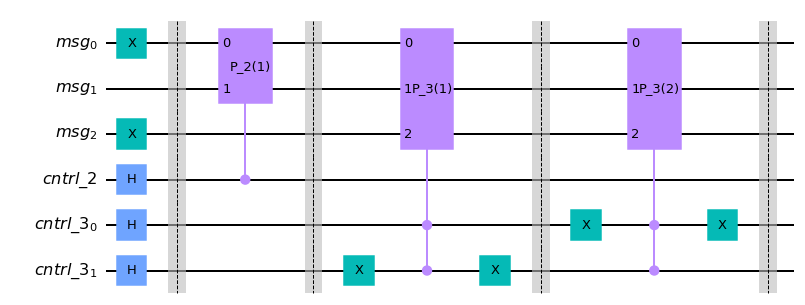

In [8]:
## generate the permutation operator ~
p2 = generate_permutation_operators(2) ## P_2
p3 = generate_permutation_operators(3) ## P_3
p3_2 = generate_permutation_operators(3,2) ##  P^2_3

## apply the permutation operators conditioned on the `cntrl` registers
qc.append(p2.control(1), [cntrl_2, qreg[0], qreg[1]] )

qc.barrier()
append_permutation_operator(p3, 1, qc, qreg, cntrl_3)

qc.barrier()
append_permutation_operator(p3_2, 2, qc, qreg, cntrl_3)

qc.barrier()
qc.draw(output= 'mpl')

To implement the controlled permutation operators, we condition on the `cntrl` registers as before. Since the powers are encoded in binary within the control registers  i.e in manner $\ket{k_3=2} = \ket{10}$, we need condition the oracles on the bitwise value of the `cntrl` registers. For eg. in the above circuit $\hat{P}_3$ operator (P_3(1) in the circuit) is conditioned such that it acts only when the `cntrl_3` is in `'01'` state, and so on. 

Next we measure the circuit to obtain the genreate permutations. First we measure the `msg` qubits only to obtain,               

{'110': 264, '011': 388, '101': 372}


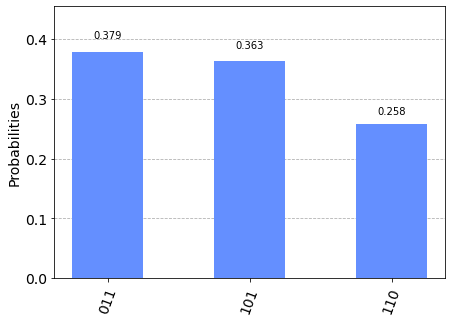

In [9]:
measure_and_plot(qc, show_counts= True, measure_ancilla= False)

Awh oh! it seems that the states are not in an equal superposition anymore. But what could have gone wrong ?

To answer this we measure and plot the states again but this time we also measure the qubits in `cntrl` register. Note than here the bit-strings output from the circuit will be of the following format `'cntrl_3 cntrl_2 msg'`and in general will have the structure `'cntrl_n ...cntrl_3 cntrl_2 msg'`.

str
{'0 0 101': 115, '0 1 011': 129, '3 1 011': 133, '1 0 011': 134, '1 1 110': 125, '2 1 101': 140, '3 0 101': 117, '2 0 110': 131}


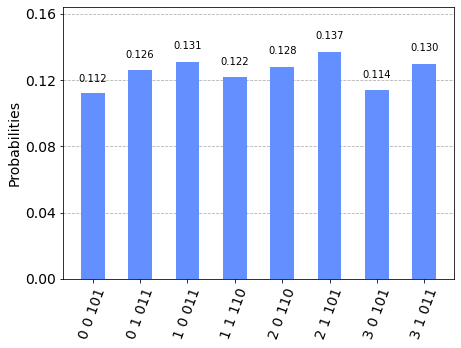

In [10]:
measure_and_plot(qc, show_counts= True, measure_ancilla= True, ancilla_specifier= 'all')

Well the histogram here look pretty uniform don't they ! But Can you spot the anomaly ? .. Ahaan! there are more than a single value of the `cntrl` bits that generates the same permutations of the states. For eg. both `'1 1'` and `'2 0'` states in the control generates the same state `'110'` of the `msg` bits.

The problem arises because all the elements in the initial string `'101'` were not distinct, thus leading to $ \frac{3!}{2!1!} = 3\; $ different permutations instead of $3! = 6$ permutations, and even then the three permutations generated are not in an equal superposition as states like `'011'` ad `'101'` are generated more frequently than the others. 

Thus under the current scheme where the `'msg'` is a binary strings we can have atmost $ \frac{n!}{(\frac{n}{2})!(\frac{n}{2})!} \approx 2^n \; $ different permutations possible corresponding to the case that half the bits are `'1'` and rest of them `'0'`. In a later section we will discuss some more advances data encoding s method such as *Amplitude encoding* and *Phase encoding*, which will let us encode a more wide variety of data types like integers and fractions.

### Applications to Secret Sharing 

In this section we will show how we can use the quantum permutation algorithm described in the last section to securely transmit secret messages. :wink:. 

As an recap of the concepts intorduced in the last section, the main idea of genrating permutations is to transform the initial state $\ket{\psi_0}$ to a state of form, 
$$       \mathcal{\hat{P}} \;=\;  \sum_{\vec{k}} \;\; \hat{\Pi}_{\vec{k}} \ket{\psi_0} \otimes \ket{\vec{k}}
$$
where $\Pi_{\vec{k}}$ denotes a particular pemutation indexed by $\vec{k}$. To put it simply we can call the $\vec{k}$ a key that controls which permutation among the set of all possible permutations $ \; \: \cup_{\vec{k}} \;\: \{ \hat{\Pi}_{\vec{k}} \} $ will act on the initial state $\ket{\psi_0}$. 

Now if we act an operator like $\hat{I} \otimes \ket{\vec{k'}}\bra{\vec{k'}}$ on the uniform superposition state it will annihilate all the permutations other than that genrated by the key $\vec{k'}$,
$$ \big( \hat{I} \otimes \ket{\vec{k'}}\bra{\vec{k'}} \big) \;\:\; \big( \sum_{\vec{k}} \;\; \hat{\Pi}_{\vec{k}} \ket{\psi_0} \otimes \ket{\vec{k}} \big) \; = \; \hat{\Pi}_{\vec{k'}} \ket{\psi_0} \otimes \ket{k'}
$$
this follows from the fact that the keys are choosen from an orthonormal basis i.e $ \braket{\vec{k'}|\vec{k}} = \delta_{\vec{k}\vec{k'}}$. Also we can recover the initial state $\ket{\psi_0}$ by changing the operator to $ \hat{\Pi}^{-1}_{\vec{k'}} \otimes \ket{\vec{k'}}\bra{\vec{k'}}$, which results to $\hat{\Pi}^{-1}_{\vec{k'}} \hat{\Pi}_{\vec{k'}} \ket{\psi_0} \otimes \ket{\vec{k'}} \;=\; \ket{\psi_0} \otimes \ket{\vec{k'}}$.

Now that we have revised the basics of generating permutations lets take an example of how this algorithm could assist in sharing secrets ! 🤫

Say we need to send some very confedential information ( could be some nuclear launch codes) over a highly unsecure channel. Now it is your utmost priority to protect the information from going into the hands of hackers so much so that you would prefer to destroy the message rather than to let it be eavesdropped!. Also you are allowed to have some assistance from some of your allies who have promised to help you in securing the transmission, but not all of them can be trusted! 🤔

Let the message be a string **`msg `**: `b_1 b_2 . . .b_n` which we encode into a quantum state of form $\mathtt{ \ket{msg} = \ket{b_1}\ket{b_2} . . \ket{b_n}} $ (** for now assume we have a way to encode non-binary messages too.) which needs to be transmitted secrely over a insecure channel infamous for eavesdroppping activity. Thus incase you send the it as it is over the channel it is likely that it will be intercepted by hackers who could then recover the message. 

However note that for an eavesddropper to retrieve infomation about the `msg`, he needs to have am exact copy of the state $ \mathtt{ \ket{msg}}$. But what if instesd of sending the message directly we send a superposition of different message strings i.e something of the form $  \mathtt{ \ket{msg}_{\mathcal{P}} = \frac{1}{\sqrt{n}} \big( \ket{msg} + \ket{msg_1} + \ket{msg_2} + . . . + \ket{msg_n}\big) }$, where $\mathtt{ \ket{msg_1} ..\ket{msg_n} }$ are permutations of the original message string `msg` ?  Well we have made the task of eavesdropper difficult as she cannot directly extract information about the $\mathtt{\ket{msg}}$ state, and it is only by a chance of $\frac{1}{n}$ that she would be lucky enough to retrieve the state $\mathtt{\ket{msg}}$ upon a measurement. Isn't that cool ! 😎


So here's the plan. We initiate the message qubits on quantum computer in a random permutation of the `msg` bits for eg. ` b_3 b_2. . . b_n-1 b_n b_1 ` which on a the quantum register would be $ \mathtt{ \ket{\psi}_{init} \:=\: \ket{b_3}\ket{b_2} . . . \ket{b_{n-1}}\ket{b_{n}}\ket{b_1}  } $.  

Next we need to deduce the permutation operator $ \hat{\Pi}_{\vec{m}}$ such that it would act on the initial state to recover the $\mathtt{\ket{msg}}$ i.e $\: \hat{\Pi}_{\vec{m}} \mathtt{\ket{\psi}_{init}}\:=\: \mathtt{\ket{msg}}$. Assuming that permutations are generated only by the procedure above , the operator $\hat{\Pi}_{\vec{m}}$ can be uniquely identified by the permutation key $ \ket{ \vec{m}}$. 

For our case, $\hat{\Pi}_{\vec{m}} = \hat{P}_n\hat{P}_2 $ which corresponds to the key $\vec{m} = \ket{100..1}$. Once deduced, we store $ \ket{\vec{m}}$ in a secure environment such that only we and our allies will have information about it.  

As for the transmission, we use our apparatus of generating all possible permutations as discussed in the previous section to prepare an equal superposition of all possible permutations of the initial state $\mathtt{\ket{\psi}_{init}}$. 
$$  \mathtt{\ket{trans}} \:=\: \mathcal{\hat{P}} \big( \mathtt{\ket{\psi}_{init}} \big) \;=\;  \sum_{\vec{k}} \;\; \hat{\Pi}_{\vec{k}} \mathtt{\ket{\psi}_{init}} \otimes \ket{\vec{k}}
$$
and then send $\mathtt{\ket{trans}}$ through the insecure channel. The odds against measuring the $\mathtt{\ket{msg}}$ stands $\frac{1}{n!}$, thus for big enough string of message we can be pretty much sure that our message won't be retrieved by the eavesdropper!

Okay! so we have a way to prevent an eavesdropping activity, but how are we going to retrieve the data ourselves ? Well, for that we need to have the the permutation key $\ket{\vec{m}}$ using which we can do a post selection at a later stage to recover the original message vector $ \mathtt{\ket{msg}}$. One possible way of doing the post-selection is by acting the a recovery operator $ \hat{R}_{\vec{m}} \:=\: \big( \hat{I}\otimes\ket{\vec{m}}\bra{\vec{m}} \big) $ on the transmitted state $\: \mathtt{\ket{trans}}$,
$$ \hat{R}_{\vec{m}}\mathtt{\ket{trans}} \:=\: \big( \hat{I}\otimes\ket{\vec{m}}\bra{\vec{m}} \big)  \sum_{\vec{k}} \;\; \hat{\Pi}_{\vec{k}} \mathtt{\ket{\psi}_{init}} \otimes \ket{\vec{k}} = \hat{\Pi}_{\vec{m}} \mathtt{\ket{\psi}_{init}} \otimes\ket{\vec{m}} \:=\: \mathtt{\ket{msg}}\otimes\ket{\vec{m}}
$$

However, the recovery operator $\hat{R}_{\vec{m}}$ is not an unitary operator, thus implementing as it is on a gate-based device is not possible!  <discussion on using grover operator instead>

It looks pretty secure way of sharing messages doesn't it afterall anyone without the permutation key $\ket{\vec{m}}$ can barely retrieve any information about $\mathtt{\ket{msg}}$. Note that we still need to pass the permutation key to the other end of the channel i.e to where the message will be retrieved, but this needs to be done classicaly by a physical agent to prevent being read by eavesdropppers. Now the permutaion key itself is actually product of partial keys encoding the powers of permutation operators, $ \ket{\vec{m}} = \ket{m_n}\ket{m_{n-1}} . . .\ket{m_2}$ as, 
$$\hat{P}^{m_n}_n\hat{P}^{m_{n-1}}_{n-1}. . \hat{P}^{m_2}_{2}  \big( \ket{\psi}_{init}  \big) \otimes \ket{m_n}\ket{m_{n-1}} . . . \ket{m_2} $$
where $m_n \in \{0,1,2,...n-1\}$ , $ m_{n-1} \in \{0,1,2...n-2 \}$ . . . , $m_2 \in \{ 0, 1\}$, and to retrieve the messaage we will need to know all of $\ket{m_n}, \ket{m_{n-1}} . . , \ket{m_{2}} $.

So what we can do is to distribute the partial keys among our allies and ask them to keep it safe untill the retrieval phase of our algorithm, since we will be assigning just a single key to each of our allies it won't be possible for them to retrieve the message on their own without having any information about the other keys. This way we could hedge the possibility of betrayal by any of our allies!😐

But what if some of them allies decide to conspire against us ?😱 and hand off the partial keys in their control to the eavesdropper ! 😈

Well we have a plan to deal that too...😉. 

First of all observe that not all of the partial keys are of equal importance ! The partial key $m_n$ can take $n$ possible values out of $\{0, 1, 2 . .n-1\}$ wheras $m_2$ can take only two possible values $ \{0, 1 \}$. Thus if we were to guess the key randomly it would much more difficult to guess the right $\ket{m_n}$ than to guess the right $\ket{m_2}$. 

Knowing this we can use the following scheme of distributing the partial keys, first we rank the allies in terms of their trustworthiness and then share the partial keys in accordance with their reliability i.e to our most reliable ally we share $\ket{m_n}$ wheras to someone we don't trust we share $\ket{m_2}$.

But how does that make things any better ? 😕

Okay..take the following example. Assume we distributed the partial keys as per our scheme, in which one of our allies, say *Brutus* is assigned the partial key $\ket{m_j}$. *Brutus* later decides to hand over his partial key to a group of eavesdropper, as well information about the initial state $\mathtt{\ket{\psi}_{init}}$ and a blueprint of our permutation generation circuit (in exchange of some bribe ofcourse!🤑).

Now, since we won't have access to $m_j$ anymore the best we can do for retrieval is to try the $j$ possible values it could take manually! 😅 . But ...for the eavesdropper ..things are still very difficult, as she will have to guess all the other partial keys $\ket{m_2}..\ket{m_{j-1}},\ket{m_{j+1}} . . \ket{m_n} $ of which there could be $\frac{n!}{j}$ possibilities, assuming that we already have some idea of reliability among our allies, we can choose a smaller $j$ to make eavesdropping computationally expensive. 🤯

Well so that was most part of our secret sharing algorithm! 

**Disclaimer**
The contents of this notebook is licensed under `MIT License 22`